<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/short-labs-pandas/LaboratoryPandas(ONE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Load datasets
python uses pandas to handle data structures
```python
import pandas
```

## Load data with pandas
```python
df = pd.read_excel('file name')
```

```python
df = pd.read_csv('file name')
```



## EDA it is a first approximation to understand data

* shape ( rows and columns)
* missing values

## Descriptive statistics
```python
describe()
value_counts()
```

In [79]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/it-ces/Datasets/main/Data-labHealth.csv')

data was loaded in df object, you can check with the *head* method the first 5 rows.


In [80]:
df.head()

,Unnamed: 0,var1,var2,var3,var4
0,0,no disease,Female,1.355427,58
1,1,disease,male,0.805698,40
2,2,no disease,Female,0.029375,49
3,3,disease,male,0.681085,45
4,4,no disease,male,1.909778,25


the df has the attribute shape, to get a attribute not is necessary write parenthesis.
shape will return a tuple with (# rows,  # columns)

In [81]:
df.shape

(100, 5)

### * Test the method *tail()*

# Columns names
Sometimes it is needed change the name of variables, or it could interested in uses lowercases or uppercases.
```python
DataFrame.colums
```
Notice that is a attribute.

In [82]:
df.columns

Index(['Unnamed: 0', 'var1', 'var2', 'var3', 'var4'], dtype='object')

# frequencies

to get frequencies we used the method over a column
```python
df['column'].value_counts()
```

In [83]:
feq = df['var2'].value_counts()

<Axes: xlabel='var2'>

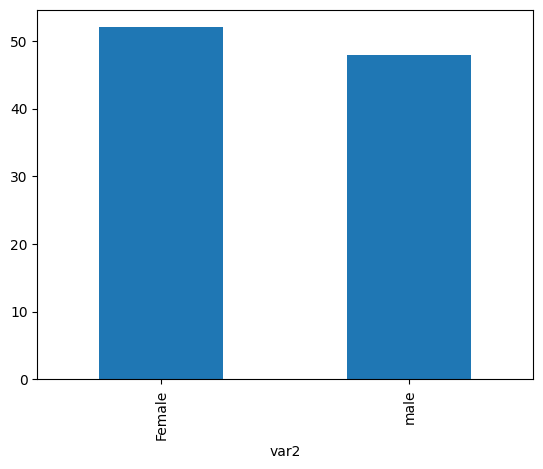

In [84]:
feq.plot.bar()

<Axes: ylabel='var1'>

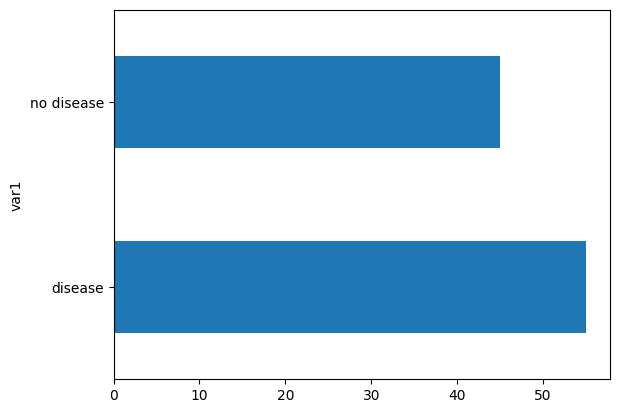

In [85]:
df['var1'].value_counts().plot(kind='barh')


# Why are important index?

In [86]:
feq

,count
var2,
Female,52
male,48


In [87]:
import matplotlib.pyplot as plt
feq = pd.DataFrame(feq).reset_index()
feq

,var2,count
0,Female,52
1,male,48


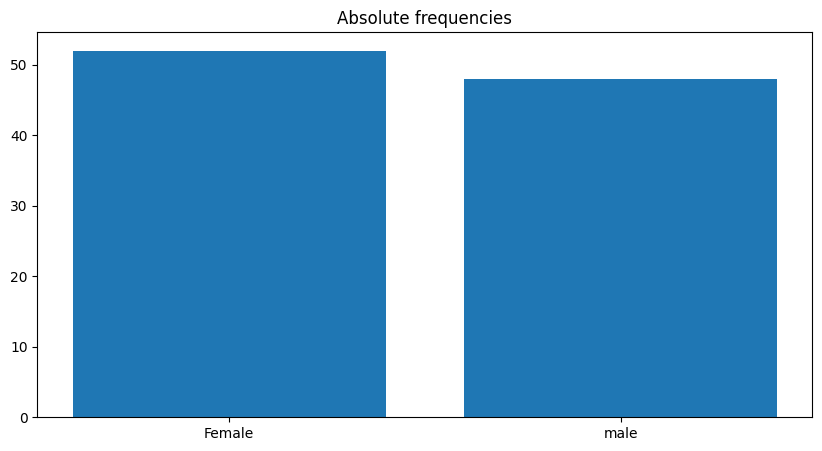

In [88]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(feq['var2'], feq['count'])
ax.set_title('Absolute frequencies')
plt.show()

# Parameters
See in the official documentation as is written.
some methods of value_counts() are:
```python
normalize = False
```
note that is a boolean value and by default is set as *False* this show us the relative frequencies.

### * Test the parameter ascending

In [89]:
df['var2'].head()

,var2
0,Female
1,male
2,Female
3,male
4,male


<Axes: xlabel='var2', ylabel='var4'>

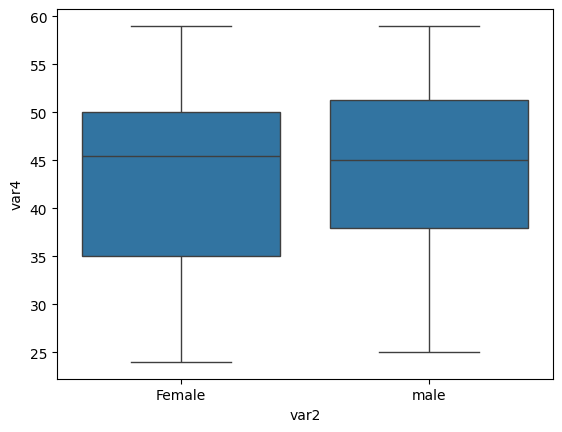

In [90]:
import seaborn as sns
sns.boxplot(x='var2', y='var4', data=df)

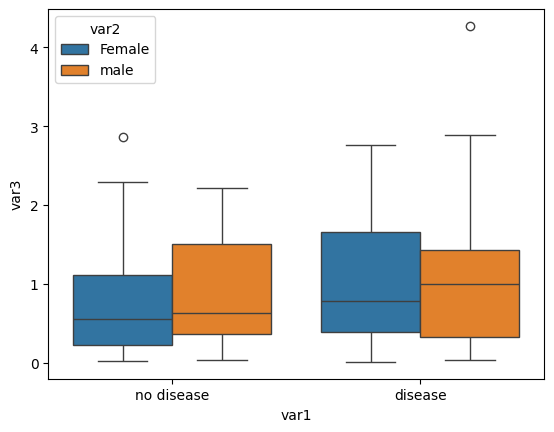

In [97]:
sns.boxplot(data = df, y = 'var3', x = 'var1', hue='var2' );

In [91]:
df

,Unnamed: 0,var1,var2,var3,var4
0,0,no disease,Female,1.355427,58
1,1,disease,male,0.805698,40
2,2,no disease,Female,0.029375,49
3,3,disease,male,0.681085,45
4,4,no disease,male,1.909778,25
...,...,...,...,...,...
95,95,disease,male,1.350235,52
96,96,disease,Female,0.074994,50
97,97,no disease,Female,0.935725,56
98,98,no disease,male,0.225422,26


# Describe method
this allow us to know some summary statistics of variables, mean, median, the min and max values
and some quantiles.

In [92]:
df.describe()

,Unnamed: 0,var3,var4
count,100.000000,100.000000,100.000000
mean,49.500000,0.968006,43.590000
std,29.011492,0.832488,9.682949
min,0.000000,0.014253,24.000000
25%,24.750000,0.326589,36.000000
50%,49.500000,0.658246,45.000000
75%,74.250000,1.479751,50.250000
max,99.000000,4.269415,59.000000


# Filter
sometimes we need a part of data, for instance see the describe of some features

In [93]:
df[df['var1']=='no disease'].head()

,Unnamed: 0,var1,var2,var3,var4
0,0,no disease,Female,1.355427,58
2,2,no disease,Female,0.029375,49
4,4,no disease,male,1.909778,25
9,9,no disease,Female,1.627200,24
14,14,no disease,Female,0.667044,54


In [94]:
df[(df['var2']=='Female')  & (df['var1']=='disease')].head()

,Unnamed: 0,var1,var2,var3,var4
5,5,disease,Female,1.581169,35
6,6,disease,Female,0.638993,52
7,7,disease,Female,2.297227,32
10,10,disease,Female,1.074536,40
12,12,disease,Female,2.405963,38


# Groupby
Make the before changes and return a dataset

In [95]:
df.groupby(by=['var1','var2'])['var4'].mean()

var1        var2  
disease     Female    42.965517
            male      46.576923
no disease  Female    42.695652
            male      41.818182
Name: var4, dtype: float64